

# Assignment - Explain the numpy.random package

![numpylogo](img/numpy.jpeg)



## Why are random numbers needed? 

The ability to generate random numbers has many useful applications. Say a researcher is interested in the effectiveness of a new ulcer drug. The population of interest is every person with ulcers. It would impractically costly and time-consuming contact everyone with ulcers, give them the drug and then compare before and after reports. Indeed, the population of people with ulcers as a total population would be impossible to judge as many people may have ulcers without ever seeking treatment or are undiagnosed. 

## Why take samples?

The researcher needs to take a sample from this population. This sample should be big enough and diverse enough so that it fairly represents the wider population. The sample data is used to make **generalisations** about its population. For example, a common bias in psychology research is using its student population as a sample of the general population. In reality students are not fair models of the general population as they are more likely to be from a more affluent and better educated subset of the general population (Hanel & Vione 2016). Sampling involves taking a sufficiently sized subset of a given population, that accurately reflects the phenomena under investigation,so that information from the sample can be used to infer things about the overall population. It is vital then that *the sample shares the same characteristics as its target population*. 

## Problems with picking samples 

Picking samples that represent a population is prone to **biases**. For example, if asked to pick a number at random between 1 and 10 there will be far more 3's and 7's than would be expected if the choice was truly random (Bellos,2014).

One way to reduce sampling bias is to use **random sampling** (Foley, 2018). Random sampling means that every item in the target population has an *equal* chance of being selected. In the example above, the target population would be the numbers between 1 and 10 inclusive and random sampling means that each number in this interval would have an equal probability of being selected. 

If random sampling is not used then certain elements of the population are favoured over others which skews the results and limits its generalising ability. In reality, it is often difficult to define the target population from its sample precisely so that *only* the phenomena in question is investigated.  

![Literary Digest](img/digest.jpg)

For example in 1936 there was a phone poll conducted by The Literary Digest which predicted that the Republican Alfred Landon would win the election 57% to 43% from the Democrat F.D.Roosevelt. However, the actual results from the election was 62% in favour of FDR. The problem was **sample bias**. Only readers of the Digest that also had phones and cars were polled and they were more likely to vote Republican in depression era America. People with cars/phones were also more likely to come from a more affluent background and were not as likely to be moved by FDR’s new deal rhetoric(Wikipedia contributors 2018a). It appears that lessons were not learned and a similar bias occurred in the 1948 Truman-Dewey United States presidential election (Foley, 2018, Wikipedia contributors, 2018a).  Random sampling does not remove sample bias but it does limit one aspect of it, biases introduced by favouring subsets of the target population rather than then every element being as likely to be selected as every other one.   


## Algorithms and random numbers

Computing algorithms are deterministic . They cannot generate true randomness without using some external piece of information(Wikipedia contributors, 2018b). 

![lave lamps](img/lava.jpg)


For example the DNS service, *Cloudflare* uses a wall of lava lamps in its head office to help generate the randomness needed for its cryptography (Liebow-Feeser, 2018). Many areas of science and computing do not need true randomness. In fact, some areas *require* predictable ‘randomness’ so that model parameters can be tested with the same random ‘noise’. Computer algorithms use **pseudo random numbers** (PRNs) (Idris, 2015). To all appearances these look random but if a key piece of information is known, the whole random sequence can be predicted. There are several **pseudo random number generator**(PRNG) algorithms. 

One of the most widely used PRNG is the *Mersenne Twister*. A Mersenne number (otherwise known as a Mersenne prime) is a prime number that is one less than a power of 2 (Weisstein, 2018). The twister aspect refers to its period length being a Mersenne prime which is ‘twisted’ by various transformations when random numbers are generated (Wikipedia contributors, 2018c). A commonly used Mersenne twister algorithm uses 19937 as its power e.g $2^19937 - 1$.  This algorithm takes a ‘seed’ value as a starting point. This is initialised into a state (or stream) and transformed via reversible and non-reversible transformations in order to generate the PRNs (Wong, n.d.). The Mersenne Twister is not secure enough for cryptography however it is a useful and widely used all purpose PRNG (Wikipedia contributors, 2018c).  

## Random numbers in Python

![python logo](img/python.png)

Python has an in-built random package *random* (Python community, 2018). NumPy extends this by adding extra functionality and methods in its *numpy.random* package (NumPy community, 2018). Both Python and Numpy.random use the Mersenne twister 19937 algorithm to generate PRNs (NumPy community, 2018; Python community, 2018; Stackoverflow, alexdor, 2018).


## Why use NumPy for generating random numbers?

Python's *random* method generates a random float number uniformly from the interval 0 inclusive to 1 exclusive (Python community, 2018). *random* has many of the functions and methods contained in numpy.random so *why use numpy.random?*

The main reason numpy.random function is used over Python’s random.random package is that NumPy is designed to work with n dimensional arrays . Numpy uses less memory and is faster than lists used in the default python.   NumPy is specialised for scientific operations and has more advanced mathematical functionality than Python. It is especially useful for manipulating numerical data that can be arranged in matrices (Oliphant, 2006; Metaspace contributors, n.d.; NumPy community, 2018). 

PRN’s can be arranged in arrays, a speciality in NumPy (NumPy community, 2018). Numpy.random and Python’s default random.random have similar functions and methods but numpy.random has some extra probability distributions common to scientific research, some extra simple random data convenience functions and more distributions (Python community, 2018; Oliphant, 2006; NumPy community, 2018).  Neither random.random or numpy.random are suitable for cryptography purposes (Stackoverflow, Hannele, 2011).

The functions and methods offered in numpy.random are the following (NumPy community, 2018): 

* simple random data
* permutations
* distributions
* random generator

*Simple random data* section consist of several functions that generate simple random data.Inputs can be sizes or ranges. *Permutation* functions randomly shuffle or permutes a given sequence. *Distribution* functions allow specific population distributions or ranges to be sampled. This may require statistical measures such as mean and standard deviation. numpy.random can generate samples from continuous and discrete distributions (Idris, 2015). Lastly, the *random generator* section contains functions that allow seeds to be specified (Mehta, 2015). This is useful in cases where the exact same sequence of random data is required. Each of these sections will be explored. 
 

## What does Simple random data do?


There are 10 simple random data functions in numpy.random, namely (Oliphant, 2006;NumPy community, 2018); 

1. rand
2. randn
3. randint
4. random_integers
5. random_sample
6. random
7. randf
8. sample
9. choice
10. bytes

Of these random, ranf and sample are aliases of random_sample, with similar inputs and outputs (Stackoverflow, askewchan,  2018). In addition rand and randn are convenience functions, meaning that their functionality can be achieved by Python's in built functions (Oliphant, 2006; NumPy community, 2018; Python community, 2018). Each of these functions are used to generate simple random data of various sizes or shapes over various intervals or ranges. Which function is used depends on the requirements. 


### Import libraries

In [3]:
#Import packages numpy and matplotlib.pyplot
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd
# display pyplot in jupyter notebook
%matplotlib inline

#### Python's default random function

Python has the built in random function for generating simple random data (Python community, 2018).

In [2]:
r1 = random.random()
print("Simple random data from python's inbuilt random function", '\n')
print(r1, '\n')
print("Simple random data from python's inbuilt random function uniformly distriubted between 0 and 1", '\n')
r2 = random.uniform(0,1)
print(r2)

Simple random data from python's inbuilt random function 

0.2652831576022916 

Simple random data from python's inbuilt random function uniformly distriubted between 0 and 1 

0.5756531014836602


numpy.random extends this, adding extra functions and methods (Oliphant, 2006;NumPy community, 2018) 


|Simple Random Data |    Input                    |     Output                                                       |
| ----------------- |--------------------------   | ---------------------------------------------------------------  |
| rand              | d0, d1, …, dn               | Random values in a given shape                                   |               
| randn             | d0, d1, …, dn               | sample (or samples) from the 'standard normal' distribution      |              
| randint           | low\[, high, size, dtype\]  | Return random integers from low (inclusive) to high (exclusive)  |            
| random_integers   | low\[, high, size \]) 	  | Random integers of type np.int between low and high, inclusive.  |
| random_sample     | \[size\]                    | Random floats in the half-open interval \[0.0, 1.0)              |               
| random            | \[size\]                    | Random floats in the half-open interval \[0.0, 1.0)              |               
| ranf              | \[size\]                    | Random floats in the half-open interval \[0.0, 1.0)              |               
| sample            | \[size\]                    | Random floats in the half-open interval \[0.0, 1.0)              |               
| choice            | a\[, size, replace, p\]     | Generates a random sample from a given 1-D array                 |                     
| bytes             | length                      | Random bytes                                                     |      

### rand

rand outputs random values in a given shape (NumPy community, 2018). Shape refers to the arrangement of the arrays. e.g. a input of  rand(1) is a single 1 by 1 matrix array(number of rows x columns); An input of (2,3) is  a 2 by 3 matrix array, while an input of (2,3,4) is 2 arrays each consisting of 3 by 4 matrix arrays. 

It creates random values in a given shape. Inputs are non negative integers, although 0 returns an empty array.  If no input is given a single number is outputted. 

Output arrays come from the continuous uniform distribution i.e. each number has the same probability of being selected in the interval between 0 inclusive and 1 exclusive \[0, 1) (square bracket indicates the number enclosed by it is included and round brackets indicates that the number enclosed by it is excluded). Rand is a convenience function as a similar output can be generated by Python's random.random function. 

#### When would you use rand?

Use rand if you want to generate random values from a uniform semi closed interval [0,1) to populate matrices of a given size; note that single floats can be generated with empty parameters and single element arrays can be generated with argument 1. It is similar to Python's random.random but extends the input to accept different array sizes (Python community, 2018; Oliphant, 2006; NumPy community, 2018).


In [6]:
print("Generate a 2 by 4 matrix filled with random numbers in [0,1) \n",np.random.rand(2,4), "\n")
print("Generate a single float \n", np.random.rand(),"\n")
print("Generate a 1-d matrix \n",np.random.rand(1), "\n")



Generate a 2 by 4 matrix filled with random numbers in [0,1) 
 [[ 0.72441121  0.59806919  0.16336741  0.49591748]
 [ 0.59357699  0.64837213  0.21460555  0.55302104]] 

Generate a single float 
 0.7494832784239026 

Generate a 1-d matrix 
 [ 0.80063078] 



### randn

randn outputs a sample(s) from the *standard normal* distribution $X\sim N(0,\,1)$ (Oliphant, 2006; NumPy community, 2018).
randn is similar to rand but takes its random numbers from the standard normal distribution with mean 0 and standard deviation 1. It is similar to the standard_normal distribution in Python.random (Python community, 2018) however standard_normal can have tuples as arguments. randn's arguments must be positive integers or integer like (such as int(1.02). Like rand, it is a convenience function with inputs for sizes. If no input given a single random number (float) from the standard normal distribution is outputted. 

Outputs take the form of n dimensional arrays in the shape specified by the inputs. If a non-standard normal distribution $X\sim N(\mu,\,\sigma^2)$ is required, the transformation $\mu + \sigma * np.random.rand()$ can be applied where $\mu$ is the mean and $\sigma$ is the standard deviation. 

#### When would you use randn?

Use randn If you want to generate random values in a specified shape with values taken from the standard normal distribution centered in a bell curve round 0 with most values falling between -3 and 3. Unlike rand - negative values can be returned. If a normal but not standard normal distribution is required you can transform the random values taken from the standard normal to the normal distribution. 

In [8]:
print("No input given  - single random float returned \n", np.random.randn(),"\n")
print("1 input given  - single random array from N(0,1) \n", np.random.randn(1),"\n")
print("5 outputs a 1x1 array of 5 random floats from N(0,1) \n",np.random.randn(5),"\n")
print("outputs 2 arrays of 3x4 matrices filled with random numbers from N(0,1) \n ", np.random.randn(2,3,4),"\n")



No input given  - single random float returned 
 0.3435460515136769 

1 input given  - single random array from N(0,1) 
 [-0.07445848] 

5 outputs a 1x1 array of 5 random floats from N(0,1) 
 [ 0.6607607   0.77116901 -1.30877506  0.69256638  0.55561735] 

outputs 2 arrays of 3x4 matrices filled with random numbers from N(0,1) 
  [[[-0.71489076  0.07594604  0.49145232 -2.05141972]
  [ 0.24479781  2.97889087  0.71252194  1.47749048]
  [ 0.29852129 -1.04380739  0.503494   -0.41580947]]

 [[-1.2541523   1.83270902  0.40039921  0.70165554]
  [-0.25537252  0.50832965 -0.80489868  0.21802505]
  [-0.49806303 -0.33700856  0.66367863  0.1750652 ]]] 



To see the shape of the distribution plot a histogram. This is the standard normal distribution around its mean of 0 with a standard deviation 1.  

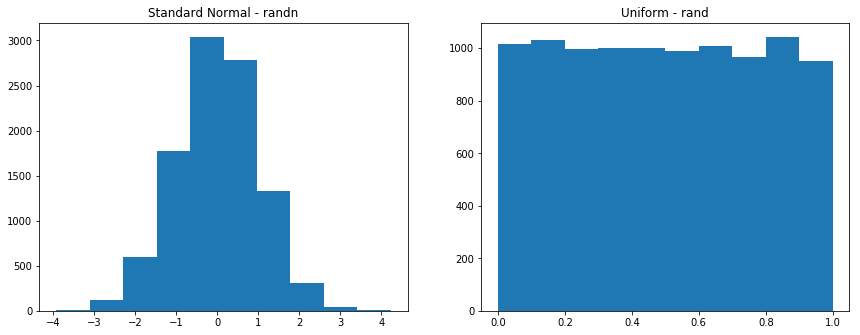

In [9]:
plt.subplot(121)
x = np.random.randn(10000)
plt.title("Standard Normal - randn")
plt.hist(x)
plt.subplot(122)
x = np.random.rand(10000)
plt.title("Uniform - rand")
plt.hist(x)
plt.subplots_adjust(bottom=1.0, right=2.0, top=2.0)
plt.show()

To generate shaped random numbers from a normal distribution N(2, 9) 
 transform randn by mean + standard deviation times randn 

this shifts the plot left to centre it round 2 with a spread of 9


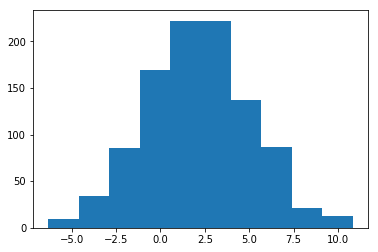

In [6]:
print("To generate shaped random numbers from a normal distribution N(2, 9) \n transform randn by mean + standard deviation times randn","\n")
plt.hist(2+3*np.random.randn(1000))
print("this shifts the plot left to centre it round 2 with a spread of 9")

### randint

randint outputs random integers from the range low (inclusive) to high (exclusive)(NumPy community, 2018). 

randint differs from the rand and randn, in that it returns **integers** not floats, within a specified interval \[low, high). Integers are returned from the **discrete** uniform distribution* $X\sim U(a,\,b)$. 

Whereas rand returned numbers from the **continuous** uniform distribution $X\sim U(0,\,1)$. 

If no arguments are given an error is returned. If one argument is given, say h then this is assumed to be the higher bound and positive and the lower bound is assumed to be  0  i.e. [0, h). 

Size can also be specified. For example if 10 random numbers are required between [0, 5) the arguments would be (0,5,10). Data type can also be specified, the default is np.int. dTypes relate to the way memory blocks are interpreted (Stackoverflow, Joe Kington,  2012).   

#### When would you use randint?

randint would be used when integers rather than floats are required and the integers lie within a certain range. e.g. generate a random number between 1 and 10 inclusive.

In [10]:
print("Generate a random integer between 1 and 10 inclusive \n",np.random.randint(1, 11),"\n")
print("Generate 3 random integer between 1 and 10 inclusive \n",np.random.randint(1, 11, 3),"\n")
print("Generate a random non negative integer less than 4 \n",np.random.randint(4),"\n")
print("Generate a random integer between -5 and 5 inclusive \n",np.random.randint(-5, 6),"\n")


Generate a random integer between 1 and 10 inclusive 
 1 

Generate 3 random integer between 1 and 10 inclusive 
 [2 8 1] 

Generate a random non negative integer less than 4 
 3 

Generate a random integer between -5 and 5 inclusive 
 1 



### random_integers

random_integers outputs random integers between low and high, inclusive. Size refers to the number of random values required from the specified interval. This function is no longer maintained (NumPy community, 2018). 

Random_integers is very similar to randint, both return integers from a *discrete uniform distribution*. However random_integers is *inclusive* of the higher range value \[low, high\]. This function is **deprecated** i.e replaced, in favour of randint. Thus when it is called by python, a warning will display in red; The function, however will still work. Both randint and random_integers can use the transformation  $a + (b - a) * \frac{np.random.random\_integers(N) - 1} {N - 1}$ to give N evenly spaced integers between $a$ and $b$ i.e. $X\sim U(a,\,b)$ but random_integers includes the $b$ value whereas randint does not.

#### When would you use random_integers?

You wouldn't. The function is retired in favour of randint. It will still work but python will give a warning when its used.  

In [11]:
print("Output ten 1's or 0's randomly \n", np.random.random_integers(0,1, 10),"\n")



Output ten 1's or 0's randomly 
 [1 1 1 0 0 1 1 0 0 1] 



C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead
  """Entry point for launching an IPython kernel.


### random_sample (random, ranf and sample)

random_sample outputs random floats in the half-open interval \[0.0, 1.0) (NumPy community, 2018).
Random_sample has several aliases (Stackoverflow, askewchan,  2013), namely random , ranf and sample . Unlike randint which returned random values from the *discrete uniform distribution* [low, high) and, rand which populates arrays with random values in a given shape, random_sample returns random floats from the continuous uniform distribution [0,1). Its input is size i.e. the number of random values required. To expand this to values outside of $X \sim U(0,\,1)$ i.e.to cover $X \sim U(a,\,b)$ the transformation $a +  (b - a)* random\_sample()$ can be used. The size can be an integer or tuples of integers (a,b,c) (Oliphant, 2006; NumPy community, 2018).  

#### When would you use random_sample or its aliases?

random_sample is used when random floats are required from the continuous uniform distribution in the interval 0 inclusive to 1 exclusive. Each number is as likely to be generated as every other. A single number can be returned E.g. pick any number in the interval [0,1) or an array of a specified size e.g. pick 20 numbers in the interval [0, 1) 

In [12]:
print("generate a random float in [0,1) \n",np.random.random_sample(), "\n")
print("generate 20 random floats in [0,1) \n",np.random.random_sample(20), "\n")


generate a random float in [0,1) 
 0.4801936016302988 

generate 20 random floats in [0,1) 
 [ 0.92777216  0.20928726  0.66472791  0.2514722   0.95003808  0.63740962
  0.3660136   0.97796164  0.3399237   0.69383505  0.32468552  0.4320625
  0.17222862  0.04097911  0.20033979  0.23774002  0.55116676  0.1793012
  0.73501156  0.38206621] 



The histogram of random_sample shows its uniform distrubution 



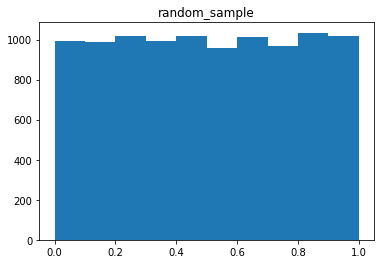

The aliases show a similar pattern 



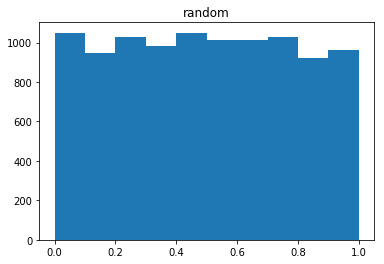

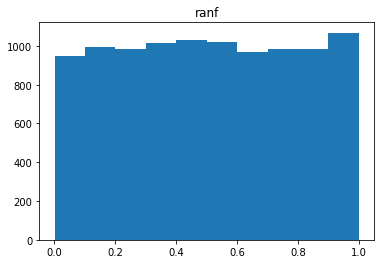

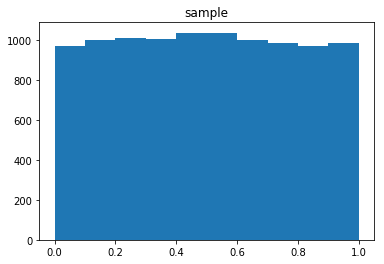

In [10]:
print("The histogram of random_sample shows its uniform distrubution", "\n")
plt.hist(np.random.random_sample(10000))
plt.title("random_sample")
plt.show()
print("The aliases show a similar pattern", "\n")
plt.hist(np.random.random(10000))
plt.title("random")
plt.show()
plt.hist(np.random.ranf(10000))
plt.title("ranf")
plt.show()
plt.hist(np.random.sample(10000))
plt.title("sample")
plt.show()



To change the interval $X \sim U(0,\,1)$ from which the numbers are selected to $X \sim U(a,\,b)$ use the transformation $a + (b - a)* random\_sample()$



This outputs an 1x10 array filled with random floats between [3, 5) 

[ 4.20249073  3.17685932  4.23865027  3.20631962  4.83706267  4.79424918
  4.09433061  3.89742236  4.12066593  4.26907559] 



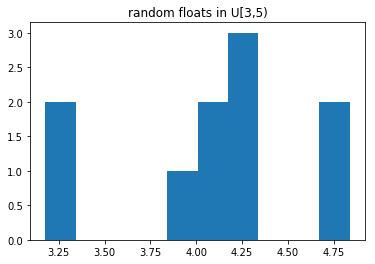

In [11]:
print("This outputs an 1x10 array filled with random floats between [3, 5)", "\n")
a,b,N=3,5,10
x = a + (b - a) * np.random.random_sample(10) 
print(x, "\n")
plt.hist(x)
plt.title("random floats in U[3,5)")
plt.show()



### choice

choice outputs a random sample from a given 1-D array (NumPy community, 2018). Its input is a 1 dimensional array or integer. The number of random values required can be specified by size. 

The difference between this function and the ones above is that here the population is specified to come from a specific finite array and the function returns one of these choices randomly. e.g. an input of all the Harry Potter book titles would randomly return one book from this population. 

The probability p of elements in the 1 d array can be specified (probabilities total to 1). If p is not provided then p is assumed to be uniformly distributed across the array. Size refers to the number of random elements from the population that are returned. There is also the option to replace which defaults to true. This refers to whether or not the random choice element is returned to the sample population and is used when unique values from the population are needed (NumPy community, 2018). 


#### When would you use choice?

choice is used when you want to generate a random choice from a fixed sample, you can specify if you want the choice to be returned to the selection pool or not. For example pick one Harry Potter book from a pool of all Harry potter books.


In [13]:
print("List all Harry Potter books", "\n")
hp = ['Harry Potter and the Philosopher’s Stone', 'Harry Potter and the Chamber of Secrets', 'Harry Potter and the Prisoner of Azkaban', 'Harry Potter and the Goblet of Fire', 'Harry Potter and the Order of the Phoenix', 'Harry Potter and the Half-Blood Prince', 'Harry Potter and the Deathly Hallows']
for book in hp:
    print(book)
print("\n")
print("pick one at random \n",np.random.choice(hp, 1), "\n")#  books can be repeatedly returned
print("pick 5 books at random and remove it from the pool when picked \n - only unique books will be returned for each choice \n",np.random.choice(hp, 5, replace=False), "\n") # only unique books are returned
print("pick 5 books at random and keep it in the pool when picked  \n- choices may be repeated \n",np.random.choice(hp, 5, replace=True), "\n")
print("Choices can be weighted to make them more or less likely \n Here, \'Chamber of Secrets\' is more likely to be selected \n", np.random.choice(hp, 5, p=[0.2,0.5,0.1,0.1,0.015,0.03,0.055], replace=True),"\n")



List all Harry Potter books 

Harry Potter and the Philosopher’s Stone
Harry Potter and the Chamber of Secrets
Harry Potter and the Prisoner of Azkaban
Harry Potter and the Goblet of Fire
Harry Potter and the Order of the Phoenix
Harry Potter and the Half-Blood Prince
Harry Potter and the Deathly Hallows


pick one at random 
 ['Harry Potter and the Deathly Hallows'] 

pick 5 books at random and remove it from the pool when picked 
 - only unique books will be returned for each choice 
 ['Harry Potter and the Philosopher’s Stone'
 'Harry Potter and the Prisoner of Azkaban'
 'Harry Potter and the Deathly Hallows'
 'Harry Potter and the Goblet of Fire'
 'Harry Potter and the Order of the Phoenix'] 

pick 5 books at random and keep it in the pool when picked  
- choices may be repeated 
 ['Harry Potter and the Order of the Phoenix'
 'Harry Potter and the Deathly Hallows'
 'Harry Potter and the Deathly Hallows'
 'Harry Potter and the Philosopher’s Stone'
 'Harry Potter and the Deathly Hall

### bytes

bytes - outputs random bytes of the specified length size (NumPy community, 2018). 

bytes takes non negative integer inputs and outputs randomly byte strings. Outputs are prefixed with b and the bytes are enclosed within apostrophes or quotation marks, hence outputs are strings of specified length (Oliphant, 2006; NumPy community, 2018).  The prefix indicates that it is a *byte literal* and will consist of ASCII characters. If the numeric value is 128 or more then escapes (\\) are used; bytes with a numeric value of 128 or greater must be expressed with escapes (Stackoverflow NPE,2011 )

#### When would you use bytes

bytes would be used when you want to generate random byte strings

In [13]:
print(np.random.bytes(0),'\n')
print(np.random.bytes(1),'\n')
print(np.random.bytes(10),'\n')

print("note the escapes - \\ used ", np.random.bytes(20),'\n')

b'' 

b'\xa4' 

b'\xc2\xa7#\x85\x04K`\x0e[\xa6' 

note the escapes - \ used  b'\xe9\xe1\xeb\xff|\xdad\xe7{\n\xc3\xc6\x80\x86sf\xec}\x1bA' 



To sum, *Simple Random Data* contains functions for generating random elements consisting of integers, arrays, sizes and shapes from continuous or discrete uniform populations or normally distributed populations that may or may not be probabilistically weighted towards some values depending on what is required. It also contains functions to randomly pick elements from a given population array such as a list or set of bytes. 

The next section of numpy.random to be discussed is its permutation functions. 

## What does permutations do?

![permutation](img/perm.png)


A permutation is a way of cycling through all options in a given set. For example choosing unique pairs of 3 numbers (1,2 and 3)would give $3^2$ combinations namely 
$$(1,1), (1,2), (1,3)$$ 
$$(2,1), (2,2), (2,3)$$
$$(3,1), (3,2), (3,3)$$.

numpy.random has two permutation functions namely (NumPy community, 2018);   
- shuffle
- permutation

The functions in this section are ways of randomly selecting elements from a finite set.

### shuffle

shuffle takes an array or array like input and randomly reorders elements in the array (Oliphant, 2006; NumPy community, 2018). E.g. randomly shuffling the order of Harry Potter books. 

#### When would you use shuffle?

shuffle is used when you have an array i.e. a finite list of elements and you want to randomly shuffle them. The same list is returned but the order items are presented in has changed. 

In [14]:
hp = ['Harry Potter and the Philosopher’s Stone', 'Harry Potter and the Chamber of Secrets', 'Harry Potter and the Prisoner of Azkaban', 'Harry Potter and the Goblet of Fire', 'Harry Potter and the Order of the Phoenix', 'Harry Potter and the Half-Blood Prince', 'Harry Potter and the Deathly Hallows']
print("Harry Potter books listed in order of publication date", "\n")
for book in hp:
    print(book)
print("\n")    
# shuffle the books
np.random.shuffle(hp)
print("Harry Potter books listed in shuffled order", "\n")
for book in hp:
    print(book)
print("\n")


Harry Potter books listed in order of publication date 

Harry Potter and the Philosopher’s Stone
Harry Potter and the Chamber of Secrets
Harry Potter and the Prisoner of Azkaban
Harry Potter and the Goblet of Fire
Harry Potter and the Order of the Phoenix
Harry Potter and the Half-Blood Prince
Harry Potter and the Deathly Hallows


Harry Potter books listed in shuffled order 

Harry Potter and the Deathly Hallows
Harry Potter and the Chamber of Secrets
Harry Potter and the Goblet of Fire
Harry Potter and the Prisoner of Azkaban
Harry Potter and the Half-Blood Prince
Harry Potter and the Philosopher’s Stone
Harry Potter and the Order of the Phoenix




For another example lets shuffle a deck of cards and then deal 5 

In [56]:
# Python program to shuffle a deck of card using the module random and draw 5 cards
# code taken from https://www.programiz.com/python-programming/examples/shuffle-card

# import modules
import itertools

# make a deck of cards
deck = list(itertools.product(range(1,14),['Spades','Hearts','Diamonds','Clubs']))

# shuffle the cards
np.random.shuffle(deck)

# draw five cards
print("Your cards are", "\n")
for i in range(5):
    print(deck[i][0], "of", deck[i][1])
print("\n 1 is Ace; 10 is Jack; 12 is Queen; 13 is King")    

    
  

Your cards are 

9 of Hearts
12 of Clubs
8 of Diamonds
3 of Diamonds
1 of Diamonds

 1 is Ace; 10 is Jack; 12 is Queen; 13 is King


### Permutation

permutation has an array as an input and randomly permutes i.e. shuffles outputs. 

permutation randomly permute a sequence, or return a permuted range (Oliphant, 2006; NumPy community, 2018). Unlike shuffle which **reorders** the **original** array, permutation **takes a copy** of the original array and **shuffles the copy**. The original array remains intact. 

In addition, permutation can take integer inputs and will output a range e.g an input of 5 will output a random range populated with unique elements from 0 to 4 inclusive (Stackoverflow, ecatmur,  2013)

#### When would you use permutation?

permutation is used when you want to shuffle your array but you also want to keep a record of your original array.


In [66]:
print("Harry Potter books listed in order of publication date", '\n')

hp = ['Harry Potter and the Philosopher’s Stone', 'Harry Potter and the Chamber of Secrets', 'Harry Potter and the Prisoner of Azkaban', 'Harry Potter and the Goblet of Fire', 'Harry Potter and the Order of the Phoenix', 'Harry Potter and the Half-Blood Prince', 'Harry Potter and the Deathly Hallows']
for book in hp:
    print(book)
print('\n')
print("books are shuffled using the permutation function","\n")
print(np.random.permutation(hp), "\n")
print("the original book order is preserved", "\n")
for book in hp:
    print(book)
print("\n")  
print("shuffle books with the shuffle function", "\n")
np.random.shuffle(hp)
for book in hp:
    print(book)
print(" \n The order of books has changed from its original order \n and it at its new shuffled order", "\n")    
for book in hp:
    print(book)

Harry Potter books listed in order of publication date 

Harry Potter and the Philosopher’s Stone
Harry Potter and the Chamber of Secrets
Harry Potter and the Prisoner of Azkaban
Harry Potter and the Goblet of Fire
Harry Potter and the Order of the Phoenix
Harry Potter and the Half-Blood Prince
Harry Potter and the Deathly Hallows


books are shuffled using the permutation function 

['Harry Potter and the Half-Blood Prince'
 'Harry Potter and the Deathly Hallows'
 'Harry Potter and the Order of the Phoenix'
 'Harry Potter and the Goblet of Fire'
 'Harry Potter and the Prisoner of Azkaban'
 'Harry Potter and the Philosopher’s Stone'
 'Harry Potter and the Chamber of Secrets'] 

the original book order is preserved 

Harry Potter and the Philosopher’s Stone
Harry Potter and the Chamber of Secrets
Harry Potter and the Prisoner of Azkaban
Harry Potter and the Goblet of Fire
Harry Potter and the Order of the Phoenix
Harry Potter and the Half-Blood Prince
Harry Potter and the Deathly Hallow

## What are distributions and why do we need them?


A probability distribution is a table or an equation that links each outcome of a statistical experiment or event with its probability of occurring (Wikipedia contributors 2018d). 

Consider tossing a coin: This has two possible outcomes, heads or tails. Here the *event* is the coin toss and the *outcome* is heads or tails. Similarly, throwing a die has 6 outcomes, 1, 2, 3, 4, 5 or 6. Outcomes of a statistical test often show a pattern based on the probability of an event occurring. E.g. rolling a fair 6 faced die will produce each of the numbers 1 to 6 roughly $\frac{1}{6}$ of the time. Similarly, tossing a non biased coin enough times will show a probability of $\frac{1}{2}$ for both heads and tails. In each of these scenarios performing the test of throwing the dice or tossing a coin, will better match its underlying probability as the number of **trials** or tries increases.

![dice](img/die.jpg)

When a random sample is generated (the event) it produces a specific outcome from a list of all possible outcomes. For example, with the coin toss, only two outcomes are possible; its either heads or its tails. These two events are *independent* i.e previous states does not influence the probability of the current state. Rolls of the die have no memory. Believing that previous running streaks will influence future chances is a common bias named the *gambler's fallacy* (Wikipedia contributors, 2018e). When the list of outcomes(heads or tails)are plotted against its probability of occurring ($\frac{1}{2}$ for both Heads and Tails)you get a *probability distribution*. 

Consider the die throw; Rolling a die 10 times may give a pattern of $1,3,5,1,4,4$ Here, the outcome i.e. probability of getting a 4, is $\frac{2}{10}$ ($\frac{1}{5}$ - two 4's from 10 throws). This is greater than the underlying probability of $\frac{1}{outcomes} = \frac{1}{6}$ but the *Law of Large Numbers* states (Stat Trek contributors, n.d.) that the more times an event is tested, i.e. the larger its sample size, the closer it will be to its underlying probability of that event occurring. Rolling  the die 10 times and getting two four's may have a probability not equal to $\frac{1}{6}$ but if the dice is rolled a very large number of  times, the small deviations from $\frac{1}{6}$ will be smoothed out and the underlying probability will be constant at $\frac{1}{6}$. This is the idea behind probability distributions; They are equations that plot the underlying model when sample size reaches the same size as its total population.

The code below simulates 10, 100, 1,000 and 1,000,000 random rolls of a dice and calculates the probability of each outcome.  As the sample size increases, the sample probability tends towards the actual probability of the distribution. 


In [17]:
print("Sample Size is 10")
size=10
outcome = np.bincount(np.random.randint(1,7,size))
print(outcome)
p1=outcome[1]/size
print("sample prob of getting 1",p1)
p2=outcome[2]/size
print("sample prob of getting 2",p2)
p3=outcome[3]/size
print("sample prob of getting 3",p3)
p4=outcome[4]/size
print("sample prob of getting 4",p4)
p5=outcome[5]/size
print("sample prob of getting 5",p5)
p6=outcome[6]/size
print("sample prob of getting 6",p6)
p = 1/6
print("actual probability",f"{p:.3}", "\n")

print("Sample Size is 100")
size=100
outcome = np.bincount(np.random.randint(1,7,size))
print(outcome)
p1=outcome[1]/size
print("sample prob of getting 1",p1)
p2=outcome[2]/size
print("sample prob of getting 2",p2)
p3=outcome[3]/size
print("sample prob of getting 3",p3)
p4=outcome[4]/size
print("sample prob of getting 4",p4)
p5=outcome[5]/size
print("sample prob of getting 5",p5)
p6=outcome[6]/size
print("sample prob of getting 6",p6)
p = 1/6
print("actual probability",f"{p:.3}", "\n")
print("Sample Size is 1000")
size=1000
outcome = np.bincount(np.random.randint(1,7,size))
print(outcome)
p1=outcome[1]/size
print("sample prob of getting 1",p1)
p2=outcome[2]/size
print("sample prob of getting 2",p2)
p3=outcome[3]/size
print("sample prob of getting 3",p3)
p4=outcome[4]/size
print("sample prob of getting 4",p4)
p5=outcome[5]/size
print("sample prob of getting 5",p5)
p6=outcome[6]/size
print("sample prob of getting 6",p6)
p = 1/6
print("actual probability",f"{p:.3}", "\n")
print("Sample Size is 1000000")
size=1000000
outcome = np.bincount(np.random.randint(1,7,size))
print(outcome)
p1=outcome[1]/size
print("sample prob of getting 1",p1)
p2=outcome[2]/size
print("sample prob of getting 2",p2)
p3=outcome[3]/size
print("sample prob of getting 3",p3)
p4=outcome[4]/size
print("sample prob of getting 4",p4)
p5=outcome[5]/size
print("sample prob of getting 5",p5)
p6=outcome[6]/size
print("sample prob of getting 6",p6)
p = 1/6
print("actual probability",f"{p:.3}", "\n")


Sample Size is 10
[0 0 4 2 1 2 1]
sample prob of getting 1 0.0
sample prob of getting 2 0.4
sample prob of getting 3 0.2
sample prob of getting 4 0.1
sample prob of getting 5 0.2
sample prob of getting 6 0.1
actual probability 0.167 

Sample Size is 100
[ 0 22 16 17  9 11 25]
sample prob of getting 1 0.22
sample prob of getting 2 0.16
sample prob of getting 3 0.17
sample prob of getting 4 0.09
sample prob of getting 5 0.11
sample prob of getting 6 0.25
actual probability 0.167 

Sample Size is 1000
[  0 155 205 154 163 180 143]
sample prob of getting 1 0.155
sample prob of getting 2 0.205
sample prob of getting 3 0.154
sample prob of getting 4 0.163
sample prob of getting 5 0.18
sample prob of getting 6 0.143
actual probability 0.167 

Sample Size is 1000000
[     0 166823 166852 166554 166664 166821 166286]
sample prob of getting 1 0.166823
sample prob of getting 2 0.166852
sample prob of getting 3 0.166554
sample prob of getting 4 0.166664
sample prob of getting 5 0.166821
sample pro

![discrete uniform distribution](img/uniform.png)



### Uniform Distribution

#### Discrete
Often there is an underlying pattern based on this probability. For example in the coin toss the probability was $\frac{1}{2}$ and in the dice roll it was $\frac{1}{6}$. In each case outcomes ($n$) were equally likely with $p = \frac{1}{n}$. This type of distribution is called a **uniform distribution**. In particular it is a *discrete* uniform distribution. i.e outcomes are from a finite set, they are either 1 or 2 or 3 etc and not midway between 2 and 3. 



Roll the dice 

5


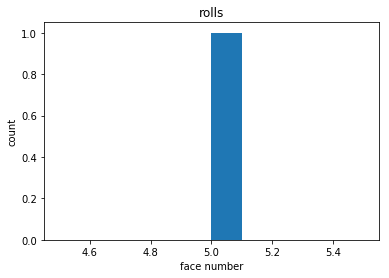

In [18]:
print("Roll the dice", "\n")
x=np.random.randint(1,7)
print(x)
plt.title("rolls")
plt.xlabel("face number")
plt.ylabel("count")
plt.hist(x)
plt.show()

Say you do this a million times and plot your results

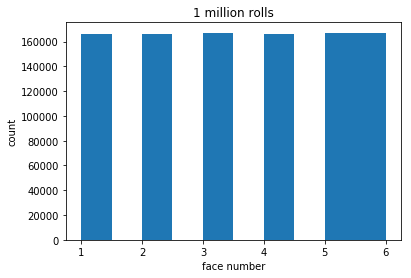

In [19]:
plt.title("1 million rolls")
plt.xlabel("face number")
plt.ylabel("count")
plt.hist(np.random.randint(1,7,1000000))
plt.show()


The results of the roll all seem to be equally likely, 1 million rolls with 6 possible outcomes is 

In [20]:
print(f"{1000000/6:.8}")


166666.67


Probability distributions have different 'shapes'.  

#### Continous

What if outcomes could be anywhere along a range rather than specific outcomes of heads/tails or die faces? 

For example, you arrive at a bus stop to catch a very regular bus that comes exactly once an hour. However you have no idea what time it is or when the bus last left the stop. The time spent waiting would be a *uniform* distribution from 0 to 1 hour, with the bus equally likely to arrive at anytime within that interval. 

Time, temperature and measures like height do not take a fixed set of values, rather they vary on a continuum. Thus the distribution these measures form are *continuous*.

Say we wanted to model the bus scenario. numpy.random has a function to allow us to do this (NumPy community, 2018).

In [67]:
print("How long will I wait for the bus?")
print(f"{np.random.uniform():.2}", " hours")
   

How long will I wait for the bus?
0.71  hours


What if the waiting times is modeled over the course of a year and the results are plotted?


[ 0.66525778  0.12907102  0.4483556   0.30527925  0.16431084  0.52534241
  0.89123503  0.52863813  0.66033132  0.71748313  0.37201841  0.09764683
  0.29718065  0.82777138  0.12602894  0.10789374  0.2120155   0.22453468
  0.13559817  0.65812252  0.63652254  0.6981214   0.72898763  0.03959231
  0.4473341   0.57909554  0.65657868  0.41896917  0.5694511   0.33299779
  0.95669391  0.90278636  0.9348984   0.07023641  0.24981565  0.67469765
  0.54379561  0.41271232  0.52395057  0.50216443  0.61209429  0.01858072
  0.54726268  0.20197317  0.10414442  0.26829567  0.95672851  0.7650277
  0.51576826  0.8463152   0.53812427  0.58156355  0.56263771  0.40590897
  0.380816    0.47043446  0.2009402   0.91277959  0.0885494   0.69592597
  0.68602724  0.60311717  0.44847712  0.47947464  0.21164565  0.99114798
  0.51597315  0.51802274  0.91560345  0.55912484  0.18863436  0.81053572
  0.0841068   0.29057566  0.6997728   0.12967113  0.65516623  0.27981524
  0.26940841  0.21573649  0.17117538  0.01849969  0.

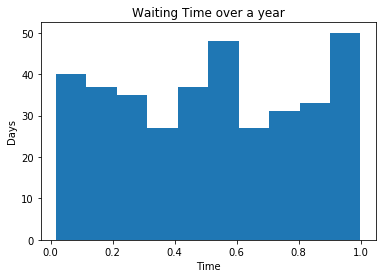

In [22]:
how_long = np.random.uniform(0,1,365)
print(how_long)
plt.hist(how_long)
plt.title("Waiting Time over a year")
plt.xlabel("Time")
plt.ylabel("Days")
plt.show()


numpy.random.uniform (Oliphant, 2006; NumPy community, 2018)takes inputs of a range low to high. Size i.e. the number of results return, can also be specified. The range interval includes the lower number but excludes the higher one. All numbers within the range are equally likely to be selected. 

The probability density function for this distribution is 
$$X\sim Uniform(a,\,b)$$
$\\ $
$$p(x) = \frac{1}{b-a}$$ where a is the low value and b is the high value. 


The probability for any event in a uniform continuous distribution is given as $\frac {1}{b-a}$ where a is the lower value of the interval and b is the higher value of the interval. 


### Binomial

Going back to the die example, what if we were only interested in getting *one* of the outcomes? Say the die was rolled 100 times but we were only counting number of times 4's were rolled? 


How many times was a 4 rolled after 100 rolls -  14 times


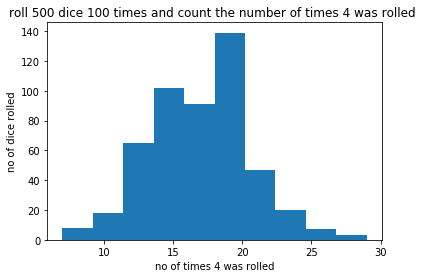

In [68]:
print("How many times was a 4 rolled after 100 rolls - ", np.random.binomial(100,1/6), "times")
plt.title("roll 500 dice 100 times and count the number of times 4 was rolled ")
plt.xlabel("no of times 4 was rolled")
plt.ylabel("no of dice rolled")
plt.hist(np.random.binomial(100,1/6, 500))
plt.show()

4 is just as likely to be rolled as any of the other faces i.e. the independence assumption holds, but the distribution pattern is different than the uniform pattern discussed earlier. 

Here there is not equal probability of outcomes. The probability of a success (in this case a 4) is $\frac{1}{6}$ but the probability of a failure (i.e. not getting a 4) is $\frac{5}{6}$. Here there is only two outcomes, success with probability $p$ or failure with probability $1-p$. This type of distribution is called a **binomial** distribution. It is a **discrete** distribution with two required parameters, the number of trials $n$, i.e. the number of times the die is rolled and the probability associated with a successful outcome $p$.

numpy.random.binomial takes inputs n i.e. number of trials and p i.e. probability of a successful event. The size can also be specified (Oliphant, 2006; NumPy community, 2018). In the special case where the size $n = 1$ the distribution is called a *Bernoulli* distribution. The binomial distribution has the probability distribution function 

$$X\sim Binomial(n,\,p)$$
$\\ $

$$P(x) = \binom{n}{x}p^x(1-p)^{n-x}$$

$\\ $
$$X\sim Bernoulli(p)$$

$$P(x) = p^x(1-p)^{1-x}$$

note that $1-p$ is the probability of the event not occurring i.e. a failure. It is sometimes denoted as $q$. 


### Geometric


Now suppose we were just interested in the time till the first 4 was rolled? The binomial distribution address the question of "how many successful events from $n$ tries"(Owen, 2015). The question now becomes "how many failures till we get the first success?". In this case we don't know what the number of tries $n$ will be. This pattern is called the **geometric** distribution. 



In [69]:
print("How many rolls till a '4' is rolled? - ", np.random.geometric(1/6), "rolls")


How many rolls till a '4' is rolled? -  9 rolls


This distribution has a different shape, it is asymmetrical with a long tail to the right (right skewed). The geometric distribution has some underlying assumptions(Wikipedia contributors, 2018f) namely, 

1. The event is made up of independent trials i.e. events do not influence each other as with the other distributions discussed. 
2. There are only two outcomes, success p or failure q
3. The probability of success is the same in each trial 


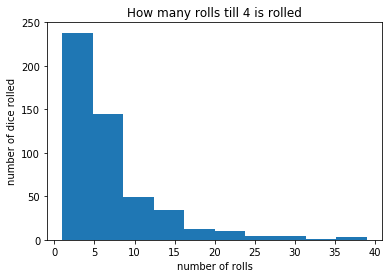

In [70]:
plt.title("How many rolls till 4 is rolled")
plt.xlabel("number of rolls")
plt.ylabel("number of dice rolled")
plt.hist(np.random.geometric(1/6, 500))
plt.show()

numpy.random.geometric has one required input, its probability of a success $p$ (Oliphant, 2006; NumPy community, 2018). The size can also be specified.  

its probability density function is 

$$X\sim Geometric(p)$$

$ \\ $

$$p(x)=  (1 - p)^{x-1}p$$ 



### Negative Binomal 


Now suppose we are still interested in the number of trials till a success is reached; But rather than stopping when the first success is reached, we want to extend the number of success, say rolling ten 4's?  

How many rolls till 10 '4s' are rolled? -  35 rolls


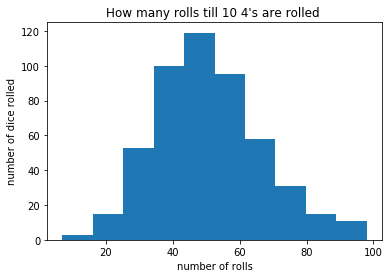

In [71]:
print("How many rolls till 10 '4s' are rolled? - ", np.random.negative_binomial(10,1/6), "rolls")

plt.title("How many rolls till 10 4's are rolled ")
plt.xlabel("number of rolls")
plt.ylabel("number of dice rolled")
plt.hist(np.random.negative_binomial(10,1/6, 500))
plt.show()


This type of distribution is called the *negative binomial* distribution. 

numpy.random.negative_binomial has two required inputs, the number of success required $n$, and the probability of a success $p$. There is also a size option (Oliphant, 2006; NumPy community, 2018). It's probability density function is

$$X\sim NegativeBinomial(n,\,p)$$
$$ \\ $$
$$P(X;n,p) = \binom{X+n-1}{X}p^{n}(1-p)^{X}$$

again $1-p$ is the probability of a failure. 


### Poisson



What if the probability $p$ was very small and the number of tries $n$ was very large? Say we have a 1000 face die that will be rolled a million times; What is the distribution of getting a 4 now? In this case the $n$ by $p$ ratio tends towards a constant rate $\lambda$. This is the *Poisson* distribution. It is frequently used when counting the number of times an event occurs over an interval of time or space. E.g. the number of customers arriving in a shop over the course of a day.  



How many customers arrive at a shop on a Sunday when the average Sunday rate is 100? -  98 customers


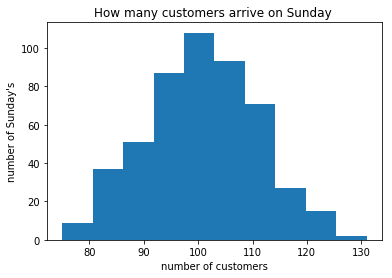

In [72]:
print("How many customers arrive at a shop on a Sunday when the average Sunday rate is 100? - ", np.random.poisson(100), "customers")

plt.title("How many customers arrive on Sunday ")
plt.xlabel("number of customers")
plt.ylabel("number of Sunday's")
plt.hist(np.random.poisson(100,500))
plt.show()

The Poisson distribution can be thought of as the limiting case of a Binomial distribution when the number of trials $n$ is very large and the probability of a success $p$ is very small (Chamberlain, 2016). 

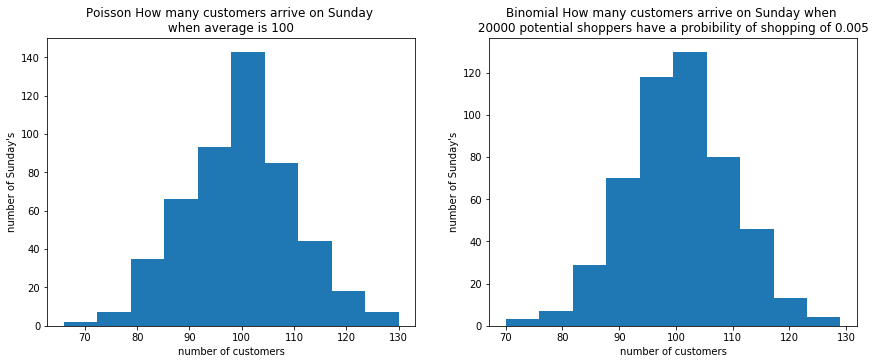

In [43]:
plt.subplot(121)
plt.title("Poisson How many customers arrive on Sunday \n when average is 100 ")
plt.xlabel("number of customers")
plt.ylabel("number of Sunday's")
plt.hist(np.random.poisson(100,500))

plt.subplot(122)
plt.title("Binomial How many customers arrive on Sunday when \n 20000 potential shoppers have a probibility of shopping of 0.005 ")
plt.xlabel("number of customers")
plt.ylabel("number of Sunday's")
plt.hist(np.random.binomial(20000, 0.005, 500))
plt.subplots_adjust(bottom=1.0, right=2.0, top=2.0)



numpy.random.posson has one required input its rate $\lambda$. Size can also be specified (Oliphant, 2006; NumPy community, 2018). 

Its probability density function is 

$$X\sim Poisson(\,\lambda)$$
$$ \\  $$
$$p(x; \lambda)=\frac{\lambda^x e^{-\lambda}}{x!}$$



### Normal

So far the focus has been the **discrete** distributions, discrete uniform, binomial, geometric, negative binomial and Poisson. The **continuous** uniform distribution was also discussed. Regarding the binomial distribution, if the number tries is very large, a bell shaped pattern emerges. 

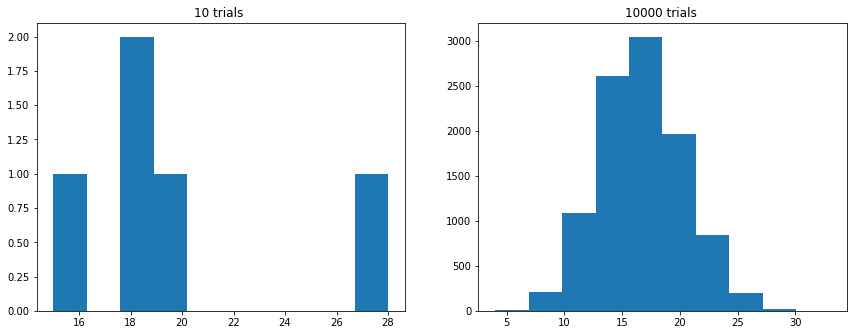

In [29]:
plt.subplot(121)
plt.title("10 trials ")
plt.hist(np.random.binomial(100,1/6, 5))
plt.subplot(122)
plt.title("10000 trials ")
plt.hist(np.random.binomial(100,1/6, 10000))
plt.subplots_adjust(bottom=1.0, right=2.0, top=2.0)

Taking this to its limit of an infinite number of trials gives one of the most ubiquitous distributions, the *Normal* distribution. This is the continuous distribution that is commonly found in real world situations. For example, measure people's height and plot the results and you will find the vast majority will be clustered around the average value with almost all heights within 3 standard deviations of this average. You may get a few cases of people being extremely tall or extremely small but you will not get someone of height 1 cm or 1 km. 

Other examples of the normal distribution include marks on an exam, blood pressure readings, salary  levels etc. For example the data below comes from the public dataset ANSUR2, in particular the male data. This is data from the U.S. Army Anthropometry survey which took several measurements of its military population and made this data publicly available (U.S. Army Anthropometry, 2012).  


The Height in Inches of Male US Military Personnel from ANSUR2 dataset 2012
0    71
1    68
2    68
3    66
4    77
Name: Heightin, dtype: int64 

count    4082.000000
mean       70.035767
std         2.947419
min        60.000000
25%        68.000000
50%        70.000000
75%        72.000000
max        94.000000
Name: Heightin, dtype: float64 



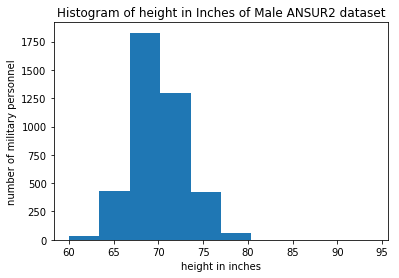

In [30]:
# data taken from http://www.ucd.ie/ecomodel/Resources/datasets_WebVersion.html in particular http://mreed.umtri.umich.edu/mreed/downloads/anthro/ANSUR2Distribution.zip
df=pd.read_csv("data/ANSURIIMALEPublic.csv", encoding = "ISO-8859-1")
print("The Height in Inches of Male US Military Personnel from ANSUR2 dataset 2012")
heights = df.loc[:,'Heightin'] 
print(heights.head(), "\n")
print(heights.describe(), "\n")
plt.title("Histogram of height in Inches of Male ANSUR2 dataset")
plt.xlabel("height in inches")
plt.ylabel("number of military personnel")
plt.hist(heights)
plt.show()


This shows the bell shape curve characteristic of the normal distribution. 

The normal distribution is especially important as many other non normal distributions such as the binomial one above, tend toward a normal distribution pattern as their sample size increases under certain assumptions of each sample added being independent from each other. This is the idea behind the ***central limit theorem*** (Yearsley, n.d.). 

numpy.random has two normal functions (Oliphant, 2006; NumPy community, 2018)

1. standard_normal
2. normal

#### Standard Normal

numpy.random.standard_normal (Oliphant, 2006; NumPy community, 2018) produces samples from the standard normal distribution. The standard normal distribution has a mean of 0 and a standard deviation of 1. 


Its probability density function is 

$$X\sim Normal(0,\, 1)$$
$$ \\ $$

$$p(x)	=	\frac{1}{\sqrt{2\pi}}e^{-\frac{x^2}{2}}$$




#### Normal

The standard normal distribution is a specific case of the *normal* distribution with a mean of 0 and a standard deviation of 1. The normal distribution can have other values for its mean $\mu$ and standard deviation $\sigma$. Its inputs are $\mu$  and $\sigma$ and it outputs random samples from this distribution. 

numpy.random.normal has as two required inputs, its mean and its standard deviation. The number of random samples from this distribution can also be specified (Oliphant, 2006; NumPy community, 2018). 

Its probability density function is 

$$X\sim Normal(\mu,\, \sigma)$$
$$ \\ $$
$$p(x) = \frac{1}{\sqrt{ 2 \pi \sigma^2 }} e^{ - \frac{ (x - \mu)^2 } {2 \sigma^2} }$$

where $\mu$ is the mean and $\sigma$ the standard deviation. The square of the standard deviation, $\sigma^2$ is called the variance.


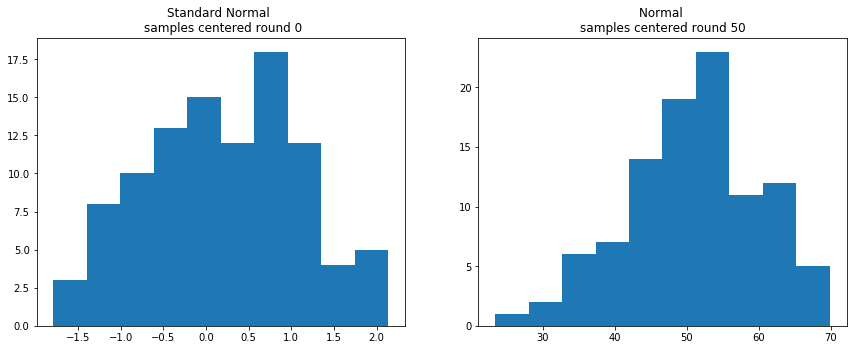

In [31]:
plt.subplot(121)
plt.title("Standard Normal \n samples centered round 0")
plt.hist(np.random.standard_normal(100))
plt.subplot(122)
plt.title("Normal \n samples centered round 50 ")
plt.hist(np.random.normal(50, 9, 100))
plt.subplots_adjust(bottom=1.0, right=2.0, top=2.0)

In general, numpy.random has 35 distribution functions (Oliphant, 2006; Wikipedia contributors, 2018g; NumPy community, 2018). Namely 

                           
1. beta - Discrete
2. *binomial* - Discrete
3. chisquare - Continuous
4. dirichlet - Joint
5. exponential - Continuous
6. f - Continuous
7. gamma - Continuous
8. *geometric* - Discrete
9. gumbel - Continuous
10. hypergeometric - Discrete
11. laplace - Continuous
12. logistic - Continuous
13. lognormal - Continuous
14. logseries - Discrete
15. multinomial - Joint
16. multivariate_normal - Continuous
17. *negative_binomial* - Discrete
18. noncentral_chisquare - Continuous
19. noncentral_f - Continuous
20. *normal* - Continuous
21. pareto - Continuous
22. *poisson* - Discrete
23. power - Continuous
24. rayleigh - Continuous
25. standard_cauchy - Continuous
26. standard_exponential - Continuous
27. standard_gamma - Continuous
28. *standard_normal* - Continuous
29. standard_t - Continuous
30. triangular - Continuous
31. *uniform* - Continuous
32. vonmises - Continuous
33. wald - Continuous
34. weibull - Continuous
35. zipf - Discrete


Each of these distributions has their own shape and parameters. numpy.random's distribution functions allows random samples to be generated from any of these probability distributions. This report has looked at several of these.

1. Uniform, discrete and continuous
2. Binomial including Bernoulli
3. Geometric
4. Negative binomial 
5. Poisson
6. Normal including Standard Normal

## What are seeds and how are they involved in generating pseudorandom numbers? 

Random number generation requires a way of producing sequences of numbers in such a way that they do not show a predictable pattern and they appear to be random. 

At start of a soccer match to decide which side of the pitch teams attack, the referee tosses a coin and the team captains pick heads or tails. This is because events like coin toss, dice throw, card picks are ways of generating random numbers. 

Modern uses of random numbers can't wait around all day to flip coins or roll dice a million times or so. They need a way of making a computer do it, while still keeping the appearance of randomness.

However, computers are deterministic, they run on predictable algorithms and any random numbers they produce has a pattern, IF, you know where to look. 

Random numbers have two characteristics that make them random. They are independent i.e. every random number only depends on its self and not on any other random number; They are uniformly distributed i.e. the are not clustered around certain values. 


Computers use algorithms to produce pseudo random numbers to mimic features of random numbers. One way of doing this is via *Random Number Streams*. Random number streams require a *seed* value to *initialise* the stream. This is the first value in the random number stream. The seed can come from any value within the stream (Houlding, n.d.). 

##  The use of seeds in generating pseudorandom numbers

For example suppose you wanted 5 random non negative integers; let the digits in $\pi$ be the random number stream; and the 'seed' be the 7th digit; Generating 5 random numbers from this stream with that seed will give 2,6,5,3,5 as these are the 7th to 11th digits of $\pi$; This could be made less predictable by altering the space between the seed and the next number in the sequence; e.g taking every third value from the same starting point would give the sequence, 2,3,9,3,8 which makes it a bit harder to spot that its numbers from $\pi =  3.14159265358979323846.....$. Once you know two pieces of information, which stream is used e.g. digits in $\pi$ in steps of 1 and the initial starting point e.g 7 - you can predict every number in the sequence; however without that information it will appear to be random. 


In [73]:
# import math  in python
import math
# format pi so it can be sliced
print("pi to 20 digits \n", f"{math.pi:.20}"[:20])
print("\n Starting from 7th value of pi, generate 5 numbers in steps of 1 \n", f"{math.pi:.20}"[7:12])
print("\n Starting from 7th value of pi, generate 5 numbers in steps of 3 \n", f"{math.pi:.20}"[7:20:3])
print("actually this looks a bit non random, which is the point of randomness, \n the digits can appear to form a pattern but any pattern is an illusion")

pi to 20 digits 
 3.141592653589793116

 Starting from 7th value of pi, generate 5 numbers in steps of 1 
 26535

 Starting from 7th value of pi, generate 5 numbers in steps of 3 
 23936
actually this looks a bit non random, which is the point of randomness, 
 the digits can appear to form a pattern but any pattern is an illusion



![random seed pic](img/randseed.png)


## Random generator

Random numbers are difficult to generate. Typically when true random numbers are required some random natural process is used such as radioactive decay levels. Computational random number generation is not truly random. Algorithms can produce long sequences of random looking data but which in reality are completely deterministic once a key piece of information is known (Wikipedia contributors, 2018h). 

numpy.random contains four functions involved with the generation of random data from a specified range or given population (NumPy community, 2018);  

* RandomState
* Seed
* get_state
* set_state 

As noted before 'random' in this sense means PRN and PRNGs. Numpy.random uses the PRNG algorithm named the 'Mersenne Twister'. This is a widely used computer algorithm that is suitable for most random number generation needs. A PRNG requires a seed as a starting point in the random sequence and this seed resides with in a class called its random state (e.g. random stream). Once a seed is defined, the random sequence it generates can be predicted.  If no seed is given then Numpy picks a 'random' one based on either the computers internal clock settings or on the computers own random number generator (H & Czygan, 2015).  


Simple random data functions and and random distribution functions operate within the same random state class. numpy.random has a class called RandomState. Random number generation uses an instance of the RandomState. Each RandomState instance has its own set of random number sequences that can be initialized by a *seed* value similar to the $\pi$ example above. Choosing different seed values within an instance of RandomState will produce a different set of random numbers, namely its *stream or thread* from within that RandomState Class (Schloerb, n.d.).   


If you want a different seed for one particular random state instance then you can specify the unique seed with the RandomState function. This creates a local random number generator that differs from the global one used by the other functions (Mc Kinney, 2018). 

Numpy.random has a function *seed* that allows the user to specify the seed for the default RandomState and therefore generate a predictable random pattern of data. This is required for statistical model testing that require the same 'random noise' to be generated. 

get_state and set_state are ways of setting a specific random state (set_state) and recalling it(get_state)for specific use (Stackoverflow Patrick Artner, 2018). 

Each of these four functions will be discussed below. 


### RandomState

![Random State](img/rstate.jpeg)

numpy.random operates within a RandomState and takes a randomly generated seed from within this state if none is specified.The seed is the key piece of information from which the 'random' pattern can be deterministically generated. This is required as there are times when its the exact same set of random numbers need to be produced. The functions in the random generator section allows the RandomState and its Seed to be specifically set and not randomly allocated. 


RandomState has  a seed value as input and outputs the container or instance of its class which contains all the random number streams for PRNG in that class (NumPy community, 2018). The seed value can be any integer from 0 to $2^{32}-1$, an array or the defalut value None which generates a random integer from the computer systems clock or other method (H & Czygan, 2015). There is always an underlying RandomState in numpy.random. All the functions in Numpy.random operate within an global instance of a default RandomState that is not explicitly set. All the functions and methods generate their random data within this state. E.g. if numpy.random.rand is used to generate some random floats then another function is called like np.random.uniform both functions will operate within the same random state. Different random numbers will be generated because the seed value will be different at each time but they will all be in the same RandomState container. RandomState allows you to specify the container to use by creating a local instance of this container. 

![Random State](img/randomstate.jpeg)

This means that rather than changing global seed for the PRNG, a container or instance is created with that specific seed. It is used prior to calling other numpy.random functions. RandomState, like the seed function, allows for functions that call and create random data to return the same random data when called again. RandomState comes with a wide varity of methods very similar to numpy.random's functions, to call various probability distributions and simple random data functions. However these are methods rather than functions as each operate within a local instance of  the RandomState and do not affect global settings of numpy.random.  


Generally RandomState is prefered over seed as if seed is used all instances of random numbers called within the session will be set to the new random state. But if RandomState is used a method is called that produces the PRNG, leaving the Global RandomState unchanged  (Stackoverflow Sven Marnach, 2011; Stackoverflow DSM 2015).  The same PRNG is used by numpy.random and python.random (NumPy community, 2018) but numpy.random has more distribution methods and functions. 

#### When would you use RandomState

RandomState is used when you want to generate the same set of random data locally without changing the global PRNG. 


In [33]:
print(np.random.RandomState())
rs = np.random.RandomState(1)
print("the current random state RandomState \n ", rs, "\n random number with rand not setting rs will vary \n ", np.random.rand()," \n random number with rand setting rs is fixed at 0.417022004702574 \n ", rs.rand())
print(" \n rs.rand with rs set to 1 will always generate the same set of random values \n", rs.rand(7))
print(" \n rs.rand with rs set to 5 will always generate the same set of random values  that differ from rs set to 1 \n", rs.rand(7))
print("\n np.random.rand will return random numbers \n ", np.random.rand())
print("\n np.random.rand will return random numbers \n ", np.random.rand(7))


the current random state RandomState 
 random number with rand not setting rs will vary 
  0.6938384475529483  
 random number with rand setting rs is fixed at 0.417022004702574 
  0.417022004702574
 
 rs.rand with rs set to 1 will always generate the same set of random values 
 [  7.20324493e-01   1.14374817e-04   3.02332573e-01   1.46755891e-01
   9.23385948e-02   1.86260211e-01   3.45560727e-01]
 
 rs.rand with rs set to 5 will always generate the same set of random values  that differ from rs set to 1 
 [ 0.39676747  0.53881673  0.41919451  0.6852195   0.20445225  0.87811744
  0.02738759]

 np.random.rand will return random numbers 
  0.4625466304344632

 np.random.rand will return random numbers 
  [ 0.3605672   0.35704521  0.05009893  0.31790287  0.23536155  0.0178859
  0.87931964]


In [34]:
# Create the random state rn with seed 10 

rn = np.random.RandomState(10)

# Create random numbers between [0,1) with the rand simple random data function
print(rn.rand(4), '\n')


[ 0.77132064  0.02075195  0.63364823  0.74880388] 



In [35]:
# Create the random state rn with seed 10 

rn = np.random.RandomState(10)

# Create random numbers between [0,1) with the rand simple random data function
print(rn.rand(4), '\n')
print(rn.rand(4), '\n')
print(rn.rand(4), '\n')

[ 0.77132064  0.02075195  0.63364823  0.74880388] 

[ 0.49850701  0.22479665  0.19806286  0.76053071] 

[ 0.16911084  0.08833981  0.68535982  0.95339335] 



I would need more time to investigate why consistently different random numbers are recalled by the rn.rand method in the above case.  I suspect its something to do with the number of times the PRNG is called. 

[ 0.4135635   1.7730444  -0.34126973 -1.10770959 -0.85747765  3.10280235
 -0.93708645  1.4062394  -1.30865288  1.47934145]


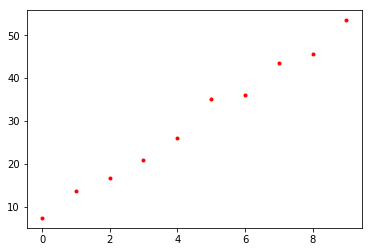

 
 the random noise changes everytime the code is run
 
 now generate the same noise pattern 

[ 1.3315865   0.71527897 -1.54540029 -0.00838385  0.62133597 -0.72008556
  0.26551159  0.10854853  0.00429143 -0.17460021]


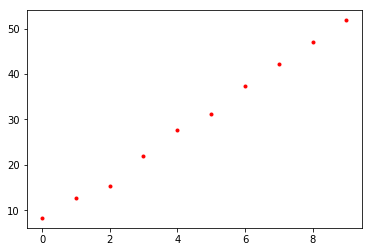

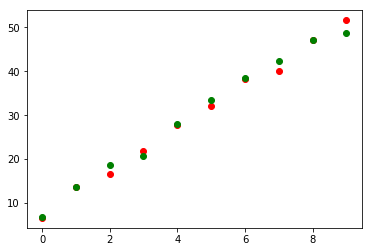

In [36]:
# create random noise from a uniform distribution

x = np.arange(0.0, 10.0, 1) # 0 to <10 in 1 increments
y = 5.0 * x + 7.0
noise = np.random.normal(0.0, 1.0, len(x)) # center, sd, size
print(noise)
plt.plot(x, y + noise, 'r.')
plt.show()

print(" \n the random noise changes everytime the code is run")
print(" \n now generate the same noise pattern \n")
rn = np.random.RandomState(10)
x = np.arange(0.0, 10.0, 1) # 0 to <10 in 1 increments
y = 5.0 * x + 7.0
noise = rn.normal(0.0, 1.0, len(x)) # center, sd, size
print(noise)
plt.plot(x, y + noise, 'r.')
plt.show()

x = np.arange(0.0, 10.0, 1) # 0 to <10 in 1 increments
y = 5.0 * x + 7.0
noise = np.random.normal(0.0, 1.0, len(x))
pseudo_noise = np.random.normal(0.0, 1.0, len(x))
plt.plot(x, y + noise, 'ro')
plt.plot(x, y + pseudo_noise, 'go')
plt.show()


### Seed

seed has as its input the starting point for the PRNG (NumPy community, 2018). No value is outputted rather it sets an internal process, the starting value for the random number stream. If the seed value is not set with this function or the RandomState function it defaults randomly generated seeds based on the computers internal clock time or internal random generator (H & Czygan, 2015). Unlike RandomState which only affects the local instance of random method calls, the seed function acts on a global scale and affects the PRNG on all the numpy.random functions. Seed is used when the same set of random data from the same random state is needed. This is used to test models particularly in machine learning. Its input is an integer or 1 dimensional array that can be converted into an unsigned 32 bit integer. If not specified, a random seed is used as mentioned above (NumPy community, 2018).  

#### When would you use Seed

Seed is used when you want to generate the same set of random data globally

seed is set to 5 
  [ 0.22199317  0.87073231  0.20671916  0.91861091  0.48841119  0.61174386
  0.76590786]
seed is set to 50 
  [ 0.49460165  0.2280831   0.25547392  0.39632991  0.3773151   0.99657423
  0.4081972 ]
seed is not set 
  [ 0.1632323   0.06797468  0.03662554  0.82299453  0.77944296  0.96972769
  0.00506574]
random values from poisson distribution are 
  [51 43 40 56 45 56 40 68 63 46]


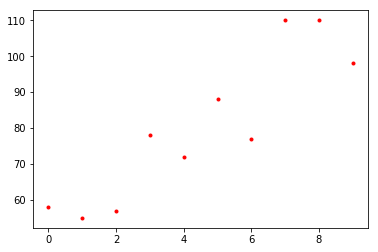

 
 the random noise changes everytime the code is run
 
 now generate the same noise pattern using seed 

random values from poisson distribution with seed = 1 are 
  [48 41 43 48 48 48 41 46 38 39]


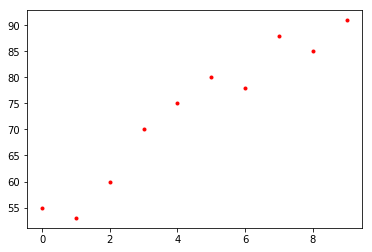

random values from poisson distribution with seed = 1 are 
  [48 41 43 48 48 48 41 46 38 39]


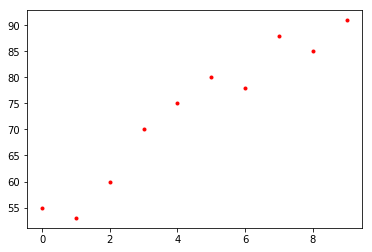

In [37]:
#set the seed
np.random.seed(5) ;
# print the random list
print("seed is set to 5 \n ", np.random.rand(7))
# set the seed
np.random.seed(50) ; 
print("seed is set to 50 \n ", np.random.rand(7))
np.random.seed(); # the default 
print("seed is not set \n ", np.random.rand(7))


# create random noise from a poisson distribution

x = np.arange(0.0, 10.0, 1) # 0 to <10 in 1 increments
y = 5.0 * x + 7.0
noise = np.random.poisson(50, 10) # center, sd, size
print("random values from poisson distribution are \n ", noise)
plt.plot(x, y + noise, 'r.')
plt.show()

print(" \n the random noise changes everytime the code is run")
print(" \n now generate the same noise pattern using seed \n")

x = np.arange(0.0, 10.0, 1) # 0 to <10 in 1 increments
y = 5.0 * x + 7.0
np.random.seed(1); 
noise = np.random.poisson(50, 10) # center, sd, size
print("random values from poisson distribution with seed = 1 are \n ", noise)
plt.plot(x, y + noise, 'r.')
plt.show()

x = np.arange(0.0, 10.0, 1) # 0 to <10 in 1 increments
y = 5.0 * x + 7.0
np.random.seed(1); 
noise = np.random.poisson(50, 10) # center, sd, size
print("random values from poisson distribution with seed = 1 are \n ", noise)
plt.plot(x, y + noise, 'r.')
plt.show()




Apart from the local and global difference, the main difference between Seed and RandomState is that seed is used prior to calling the PRNG function such as rand or normal so that the same random numbers are generated; While RandomState is set prior to calling a method of random state. 

In [74]:
# quick calculation
p = 624*32
p



19968

### get_state

get_state has no input and returns a tuple representing the internal state of the generator (NumPy community, 2018). It outputs 5 items; 

Firstly, a string 'MT19937' which denotes the Mersenne Twister 19937 generator used i.e. $2^{19937} -1$. Thus there are 19937 state (Stackoverflow, ali_m 2015) that can be used to generate $2^{(264)(32)=19968}$ random values. Its state is an array of 624 32 bit integers (Stackoverflow,  Robert Kern  2014) 

The second output item is this array of 624 unsigned 32 bit integer keys. Hence there is enough bits to represent all the internal states; The first item in this array is the seed value. 

The third output was difficult to find information on but (Cppreference community 2016)suggests that the Mersenne Twister engine has a *discard* third argument that advances the engine on by a specific amount (similar idea as in the step distance to use in picking the second digit in the $\pi$ example given above).  

The fourth and fifth output refers to generator states for the standard normal variable (Stackoverflow,  Mark Dickinson, 2017). The Box-Muller transformation is used by numpy which creates pairs of these variables, one for immediate use and one stored for later use (Wikipedia contributors (2018i). 

#### When would you use get_state?

You would use get_state when you want to identify the current RandomState used by the Mersenne Twister in numpy.random. Normally you would pass the state into a variable so that it can be used in conjunction with set_state. 

In [38]:
# Create the random state rn with seed 10 
# example adapted from https://www.machinelearningplus.com/python/numpy-tutorial-part1-array-python-examples/

rn = np.random.RandomState(5) # this array has a RandomState created
print(rn)

print("the version of the prng used \n",rn.get_state()[0])
print("the 624 array used for integer keys \n note that the first item in the array is the seed value \n" ,rn.get_state()[1])
print("the  no of keys  \n" ,rn.get_state()[2])
print("to do with the  state of the generator for standard normal deviates \n" ,rn.get_state()[3])
print("to do with the  state of the generator for standard normal deviates \n" ,rn.get_state()[4])

np.random.seed(10)
print("the version of the prng used \n",np.random.get_state()[0])
print("the 624 array used for integer keys \n note that the first item in the array is the seed value \n" ,np.random.get_state()[1])
print("the  no of keys  \n" ,rn.get_state()[2])
print("to do with the  state of the generator for standard normal deviates \n" ,np.random.get_state()[3])
print("to do with the  state of the generator for standard normal deviates \n" ,np.random.get_state()[4])

the version of the prng used 
 MT19937
the 624 array used for integer keys 
 note that the first item in the array is the seed value 
 [         5  472231674 2253902500 3404394881 1014880846  396156619
 4289431837  316679901 3007748665 2667670608  214277732 1349976447
 2704409794 2122751949 1697986442 2441432294  167336452 2259199909
 1809023989 1203544919    3110658 2457339359 1770558791 1471109813
 3668253980 2140345428 1966834339   64044037  986602261 4223347814
 1314754807 3157776173 3665366187  840951401 1908611215 3724455465
 1540698294 3677300568  757545485 3773160520 1738607807 2475537695
 1017117083 3203296594 2847994044 4146506019 1386404302  158905818
 1189570866  889048144  279473090 2120963517 4183715680 3146968388
 2799440596 1723987109  921520364  907546965 2383958979 3400684640
 2050573899   54285679 3129941001 2563044246 3306835364 1786774052
  816424411 3920470698 3693911537  666817215  608853153 2437919948
 3587609486 3078204394  324532946  716068645  560869093  1984

### set_state

If you want to use a specific RandomState you can set it with the set_state function. set_state allows the internal state of the Mersenne Twister to be fixed (NumPy community, 2018). 

numpy.random.set_state has one input, the state of the RandomState required. The state is a tuple with five entries as per get_state. This five entry tuple was discussed in the get_state section above. 

It is not necessary to input this tuple manually. get_state and set_state are used in conjunction to identify the state via get_state and to set it via set_state as noted earlier.


In [40]:
state = np.random.get_state() # fixes a random state into a variable
print(np.random.rand(10),"\n")

np.random.set_state(state)
print(np.random.rand(10),"\n")

print("state is not set this time \n", np.random.rand(10),"\n")

[ 0.63364823  0.74880388  0.49850701  0.22479665  0.19806286  0.76053071
  0.16911084  0.08833981  0.68535982  0.95339335] 

[ 0.63364823  0.74880388  0.49850701  0.22479665  0.19806286  0.76053071
  0.16911084  0.08833981  0.68535982  0.95339335] 

state is not set this time 
 [ 0.00394827  0.51219226  0.81262096  0.61252607  0.72175532  0.29187607
  0.91777412  0.71457578  0.54254437  0.14217005] 



In conclusion, numpy.random offers more distributions and efficiency in processing arrays than the default python.random. It has a wide array of shapes in which to generate random numbers from; Shapes can be matrices or distributions. It has functions that allow the random numbers to be regenerated in a predictable sequence.  

## References


Bellos, A. (2014, June 13). The World's Most Popular Numbers [Excerpt]. Retrieved November 4, 2018, from https://www.scientificamerican.com/article/most-popular-numbers-grapes-of-math/

Chamberlain, A. (2016, November 10). Deriving the Poisson Distribution from the Binomial Distribution Retrieved November 4, 2018, from https://medium.com/@andrew.chamberlain/deriving-the-poisson-distribution-from-the-binomial-distribution-840cc1668239

Cppreference community. (2016 September 17). Std::mersenne_twister_engine. Retrieved November 5, 2018, from https://en.cppreference.com/w/cpp/numeric/random/mersenne_twister_engine

Foley, B. (2018, June 12). How to Avoid Sampling Bias in Research. Retrieved November 4, 2018, from https://www.surveygizmo.com/resources/blog/how-to-avoid-sampling-bias-in-research/

H, Vo.T.P. & Czygan, M. (2015). Getting Started with Python Data Analysis. Packt Publishing.

Hanel, P. H., & Vione, K. C. (2016). Do Student Samples Provide an Accurate Estimate of the General Public?. PloS one, 11(12), e0168354. doi:10.1371/journal.pone.0168354

Houlding, B. (n.d.). Random Numbers. Lecture. Retrieved November 6, 2018, from https://www.scss.tcd.ie/Brett.Houlding/Domain.sites2/sslides3.pdf. 

Idris, I. (2015). NumPy beginners guide: Build efficient, high-speed programs using the high-performance NumPy mathematical library. Birmingham: Packt.

Liebow-Feeser, J. (2018, August 29). Randomness 101: LavaRand in Production. Retrieved November 4, 2018, from https://blog.cloudflare.com/randomness-101-lavarand-in-production/

Mc Kinney, W. (2018). Python for Data Analysis (2nd ed.). USA: O Reilly.

Mehta, H. K. (2015). Mastering Python scientific computing: A complete guide for Python programmers to master scientific computing using Python APIs and tools. Birmingham: Packt Publishing.

Metaspace contributors, (n.d.), Python – Numpy Arrays. (2018, March 25). Retrieved November 4, 2018, from https://metaspace.blog/programming/python/python-numpy-basics/


NumPy community, (2018). NumPy Reference
Release 1.15.1.\[ebook\] Retrieved from https://docs.scipy.org/doc/numpy/numpy-ref-1.15.1.pdf

Oliphant, T. (2006). Guide to NumPy. 1st ed. \[ebook\] Available at: https://docs.scipy.org/doc/_static/numpybook.pdf \[Accessed 20 Oct. 2018\].

Owen, S. (2015, December 04). Common Probability Distributions: The Data Scientist's Crib Sheet. Retrieved November 4, 2018, from https://blog.cloudera.com/blog/2015/12/common-probability-distributions-the-data-scientists-crib-sheet/

Python community. (2018). Python 3.7.1 Random - Generate pseudo-random numbers. Retrieved November 4, 2018, from https://docs.python.org/3/library/random.html

Schloerb, P. (n.d.). Random Numbers Random Walk Computational Physics Random Numbers Random Walk. Lecture. Retrieved November 5, 2018, from https://www.astro.umass.edu/~schloerb/ph281/Lectures/RandomNumbers/RandomNumbers.pdf 

Stackoverflow, alexdor(2018, March 9). Why do the numpy and random modules give different random numbers for the same seed? Retrieved November 4, 2018, from https://stackoverflow.com/questions/49195632/why-do-the-numpy-and-random-modules-give-different-random-numbers-for-the-same-s

Stackoverflow, ali_m(2015, August 24). How can I retrieve the current seed of NumPy's random number generator? Retrieved November 4, 2018, from  https://stackoverflow.com/questions/32172054/how-can-i-retrieve-the-current-seed-of-numpys-random-number-generator

Stackoverflow, askewchan 2013, September 16). Difference between various numpy random functions Retrieved November 4, 2018, from https://stackoverflow.com/questions/18829185/difference-between-various-numpy-random-functions

Stackoverflow, DSM (2015, September 8). How to use random.RandomState Retrieved November 4, 2018, from https://stackoverflow.com/questions/32462273/how-to-use-random-randomstate

Stackoverflow, ecatmur (2013 March 18). Shuffle vs permute numpy Retrieved November 4, 2018, from https://stackoverflow.com/questions/15474159/shuffle-vs-permute-numpy

Stackoverflow, Hannele (2011, August 11). Differences between numpy.random and random.random in Python? Retrieved November 4, 2018, from https://stackoverflow.com/questions/7029993/differences-between-numpy-random-and-random-random-in-python

Stackoverflow, Joe Kington (2012, Febuary 26). What does .dtype do? Retrieved November 4, 2018, from https://stackoverflow.com/questions/9457037/what-does-dtype-do

Stackoverflow,  Mark Dickinson (2017, June 1). Converting to and from numpy's np.random.RandomState and Python's random.Random? Retrieved November 4, 2018, from  https://stackoverflow.com/questions/44313620/converting-to-and-from-numpys-np-random-randomstate-and-pythons-random-random

Stackoverflow, NPE (2011, June 7). What does the 'b' character do in front of a string literal? Retrieved November 4, 2018, from https://stackoverflow.com/questions/6269765/what-does-the-b-character-do-in-front-of-a-string-literal

Stackoverflow, Patrick Artner (2018, January 29). Python random.getstate() and random.setstate() Retrieved November 4, 2018, from https://stackoverflow.com/questions/48504854/python-random-getstate-and-random-setstate

Stackoverflow,  Robert Kern (2014, January 3). Choose random seed and save it Retrieved November 4, 2018, from  https://stackoverflow.com/questions/20911147/choose-random-seed-and-save-it

Stackoverflow, Sven Marnach (2011, April 29). Consistently create same random numpy array Retrieved November 4, 2018, from  https://stackoverflow.com/questions/5836335/consistently-create-same-random-numpy-array/

Stat Trek Contributors. (n.d.). Stat Trek. Retrieved November 4, 2018, from https://stattrek.com/statistics/dictionary.aspx?definition=law_of_large_numbers

U.S. Army Anthropometry. (2012). ANSUR II MALE Public (ANSUR 2)  [zipped csv]. Retrieved from http://mreed.umtri.umich.edu/mreed/downloads.html 

Weisstein, Eric W. (2018). "Mersenne Prime" From MathWorld--A Wolfram Web Resource.[online] Retrieved October 20, 2018, from http://mathworld.wolfram.com/MersennePrime.html [

Wikipedia contributors. (2018a, August 15). Sampling bias. In Wikipedia, The Free Encyclopedia. Retrieved 12:53, November 4, 2018, from https://en.wikipedia.org/w/index.php?title=Sampling_bias&oldid=855021882

Wikipedia contributors. (2018b, August 6). Deterministic algorithm. In Wikipedia, The Free Encyclopedia. Retrieved 12:56, November 4, 2018, from https://en.wikipedia.org/w/index.php?title=Deterministic_algorithm&oldid=853694464

Wikipedia contributors. (2018c, October 20). Mersenne Twister. In Wikipedia, The Free Encyclopedia. Retrieved 13:04, November 4, 2018, from https://en.wikipedia.org/w/index.php?title=Mersenne_Twister&oldid=

Wikipedia contributors. (2018d, October 13). Probability distribution. In Wikipedia, The Free Encyclopedia. Retrieved 17:24, November 4, 2018, from https://en.wikipedia.org/w/index.php?title=Probability_distribution&oldid=863786713

Wikipedia contributors. (2018e, October 21). Gambler's fallacy. In Wikipedia, The Free Encyclopedia. Retrieved 17:35, November 4, 2018, from https://en.wikipedia.org/w/index.php?title=Gambler%27s_fallacy&oldid=865002258

Wikipedia contributors. (2018f, October 10). Geometric distribution. In Wikipedia, The Free Encyclopedia. Retrieved 18:34, November 4, 2018, from https://en.wikipedia.org/w/index.php?title=Geometric_distribution&oldid=863324032

Wikipedia contributors. (2018g, October 25). List of probability distributions. In Wikipedia, The Free Encyclopedia. Retrieved 20:50, November 4, 2018, from https://en.wikipedia.org/w/index.php?title=List_of_probability_distributions&oldid=865630495

Wikipedia contributors. (2018h, November 2). Random number generation. In Wikipedia, The Free Encyclopedia. Retrieved 10:23, November 5, 2018, from https://en.wikipedia.org/w/index.php?title=Random_number_generation&oldid=866915695

Wikipedia contributors. (2018i, November 4). Box–Muller transform. In Wikipedia, The Free Encyclopedia. Retrieved 17:45, November 5, 2018, from https://en.wikipedia.org/w/index.php?title=Box%E2%80%93Muller_transform&oldid=867236035

Wong, D. (n.d.). How does the Mersenne's Twister work? Retrieved November 4, 2018, from https://www.cryptologie.net/article/331/how-does-the-mersennes-twister-work/

Yearsley, J. (n.d.). Data Distributions. Retrieved November 4, 2018, from http://www.ucd.ie/ecomodel/Resources/Sheet4_data_distributions_WebVersion.html#central_limit_theorem

